Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues. Please remember to always use the np library for mathematical functions (e.g., np.log, np.exp, np.sum, etc)

In [8]:
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
%matplotlib inline

Q1) [5 points] Implement the sigmod funcation discussed in class. The function takes a value, x, as input and returns the sigmoid function applied to the value.

In [9]:
def sigmoid(x):
    # add small epsilon as recommended by Prof. Vosoughi to avoid log(0) error later on
    epsilon = 0.000000001
    y = 1.0/(1.0 + np.exp(-x))
    y += epsilon
    return y

Q2) [20 points] Implement the logistic regression model and the cross entropy cost discussed in class. Note that the logistic regression model relies on the sigmoid function (which you have implemented above) and the linear  model (which you have implemented in HW2). You can use the linear model from HW2 for this problem. Similar to the least-squares cost from HW2, the cross entropy cost takes in as input an array of weights, w, an array of x's and an array of ys and return a float indicating the total cost.

In [10]:
# linear model from HW2
def model(x,w):
    # create row of ones to multiply by bias term
    new_row = np.ones(x.shape[1])
    # append row to x's
    x_o = np.vstack((new_row,x))
    # calculate linear combination of x and w
    y_predicted = np.array(x_o.T@w)
    return y_predicted

# logistic regression cross entropy cost
def cross_entropy(w,x,y):
    cost = (y * np.log(sigmoid(model(x,w)))) + (1.0-y)*(np.log(1 - sigmoid(model(x,w))))
    # average over all points and multiply by -1
    mean_cost = -1*np.mean(cost)
    return mean_cost

Q3) [2 points] Run the code below to read a data file. Plot a scatter plot of x vs y.

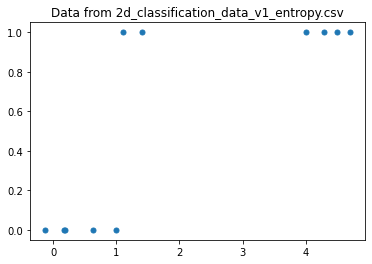

In [11]:
csvname = '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# plot data
plt.scatter(x,y,s=25)
plt.title("Data from 2d_classification_data_v1_entropy.csv")
plt.show()

Q4) [10 points] Move the gradient descent function from HW2. Run the function using the cross_entropy cost and the x and y from above. The parameters should be set to: max_its=2000,w=[3.0,3.0 ], and alpha=1. Save the cost and weight history returned by the gradient descent function. Plot the cost history.


In [12]:
# gradient descent from HW2
def gradient_descent(g,alpha,max_its,w,x,y):
    # find gradient of function
    gradient = grad(g)
    # empty lists for cost history and weight history
    cost_history = []
    weight_history = []
    w=w.copy()
    # loop over iterations
    for k in range(max_its):
        # calculate cost
        cost = g(w,x,y)
        # add to cost history
        cost_history.append(cost)
        # add weight to weight history
        weight_history.append(w)
        # update weight according to cost and learning rate
        w -= alpha*gradient(w,x,y)
    # return cost history
    return weight_history, cost_history

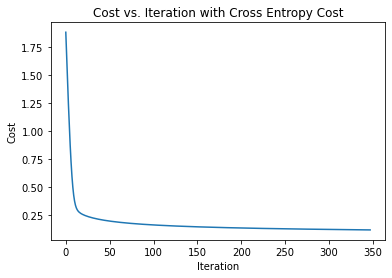

In [13]:
# define the initial weight, max iterations, and learning rate
w=np.array([3.0,3.0])
max_its=2000
alpha=1

# run gradient descent to get the weight and cost history
weight_history, cost_history = gradient_descent(cross_entropy,alpha,max_its,w,x,y)

# plot data
plt.plot(range(max_its),cost_history)
plt.title("Cost vs. Iteration with Cross Entropy Cost")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()


Q5) [10 points] Implement a logistic regression classifier that takes in the learned weights and x as input and returns the probability of the positive class (note that this is just the output of the sigmoid applied to the linear combination of the x and w)

In [14]:
def logistic_regression(learned_w,x):
    # apply sigmoid to model output
    positive_class_prob = sigmoid(model(np.array([x]), learned_w))
    return positive_class_prob

Q6) [5 points] Use the learned weights from the last gradient descent run and the logistic regression function implemented above to plot the learned curve. You can use the linspace method (shown below) to generate a list of xs that you can use. You need to generate a y for each of the candidate xs using the logistic regression function and the learned weights. On the same figure, also plot the scatter plot from Q3. 


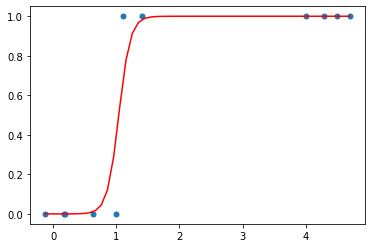

In [15]:
# generate x's for plotting
s = np.linspace(np.min(x),np.max(x))

# scatter plot of the data
plt.scatter(x,y,s=25)

# find the minimum cost and associated weights
min_index = cost_history.index(min(cost_history))
w = weight_history[min_index]

# plot the learned line
plt.plot(s, logistic_regression(w,s), color = 'r')
plt.show()

Q7) [5 points] Slightly modify the logistic regression model above so that it returns a 1 or 0 based on the specified threshold.

In [16]:
def logistic_regression_modified(learned_w,x, threshold):
    positive_class_prob = sigmoid(model(np.array([x]), learned_w))
    # returns a 1 or 0 based on the threshold
    np.where(positive_class_prob > threshold, 1, 0)
    return class_label

Q8) [15 points] Write a function (called evaluate) that takes in actual and predicted ys (for a binary classification problem) and return a confusion matrix and the accuracy. Use the modified logistic regression model and the evaluate function below to report the confusion matrix and accuracy for the x and y used for our training at a threshold of 0.5.  

In [17]:
def evaluate(y_actual,y_pred):
    # initialize all as 0
    false_positive = 0
    false_negative = 0
    true_positive = 0
    true_negative = 0 
    
    # update proper category according to predicted and actual y's
    for i in range(len(y_pred)):
        if y_actual[i] == 1 and y_pred[i] == 1:
            true_positive += 1
        elif y_actual[i] == 0 and y_pred[i] == 0:
            true_negative += 1
        elif y_actual[i] == 0 and y_pred[i] == 1:
            false_positive += 1
        elif y_actual[i] == 1 and y_pred[i] == 0:
            false_negative += 1
    
    # divide correct labels over total to find accuracy
    accuracy = true_positive+true_negative/false_positive+false_negative+true_positive+true_negative
    
    return false_positive, false_negative, true_positive, true_negative, accuracy

Q9) [20 points] Implement the perceptron cost function from the class (the softmax version). Note that the perceptron cost also uses the linear model (the model function from question 2).

In [18]:
def perceptron_cost(w,x,y):
    cost = np.log(1+np.exp(y * model(x,w)))
    # average over all points
    mean_cost = np.mean(cost)
    return mean_cost

Q10) [10 points] Run gradient descent function using the perceptron cost and the x and y from above and the parameters set to: max_its=2000,w=[1.0,1.0], and alpha=1.0. Save the cost and weight history returned by the gradient descent function. Plot the cost history. Which cost seems to do better on this dataset? Why do think that is?


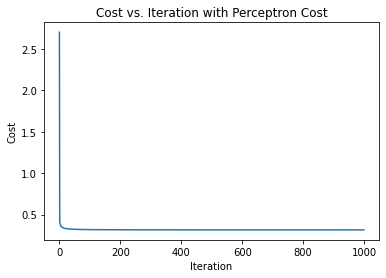

In [24]:
max_its=2000
w= np.array([1.0,1.0])
alpha=1.0

weight_history1, cost_history1 = gradient_descent(perceptron_cost,alpha,max_its,w,x,y)

plt.plot(range(max_its),cost_history1)
plt.title("Cost vs. Iteration with Perceptron Cost")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

Perceptron cost seems to perform better on this dataset; as visible from the graph above, cost drops off sharply before leveling out. This is perhaps because the shape of the perceptron cost function is better suited for finding global minima given the starting position and learning rate.

## The rest of these problems are for bonus points

Q11) [2 points]  The file 'heart.csv' has 304 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns. Read the data file. Note that the first line is the header describing each column.

In [389]:
csvname = 'heart.csv'
# load in the data, excluding the first row
data = np.loadtxt(csvname,delimiter=',',dtype=str,skiprows=1)

Q12) [2 points] Use the data above to set y to be the "target" and X to be the remaining columns.

In [390]:
# index into data to pull out desired columns, and convert data type to float
y = np.array(data[:,13],dtype='float')
x = np.array(data[:,:12],dtype='float')

Q13) [2 points] Run the code below to import the logistic regression and the train_test split functions from sklearn. Split your data into 80% train 20% test.

In [391]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

# split the data into 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Q14) [5 points] Use sklearn to fit a logistic regression model on your training set. Use all the default parameter. Do not evaluate at this point. (You can find out about sklearn logistic regression here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [393]:
# fit a logistic regression model to the training data
logisticModel = LogisticRegression()
logisticModel.fit(x_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Q15) [5 points] Use the .predict_proba function of the logistic regression model that you have learned on your X_test. Note that the .predict_proba function returns an array of tuples where each element corresponds to the predicted probability for class 0 and 1 of the data point.

In [394]:
probabilities = logisticModel.predict_proba(x_test)

Q16) [2 points] Filter the predicted probabilties from the last question to an array containing only the probabilites for class 1. I.e., you should no longer have tuples.

In [395]:
class_1_probabilities = probabilities[:,1]
print(class_1_probabilities)

[0.98169001 0.09010176 0.78805198 0.90032214 0.77792783 0.1273485
 0.56252549 0.12472268 0.87290209 0.44643946 0.01191173 0.95953192
 0.90756297 0.24903665 0.53969546 0.98464417 0.36460625 0.10414161
 0.9375412  0.96398919 0.81656174 0.08008518 0.97520591 0.1442734
 0.93213898 0.38185564 0.94807352 0.94718724 0.07886173 0.81798033
 0.16493924 0.00200379 0.11290984 0.1644248  0.90455939 0.19802587
 0.84031589 0.01200703 0.82843758 0.30676898 0.34447515 0.02192705
 0.05168754 0.17152065 0.98427843 0.17307491 0.8848569  0.95039434
 0.59337661 0.72378329 0.23643285 0.95102787 0.00410535 0.47018403
 0.94806528 0.69265161 0.95966584 0.6412256  0.84397453 0.80763943
 0.00486594]


Q17) [8 points] Use the roc_curve function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) to plot the ROC curve for your predictions using the predicted probabilities for class 1 and your y_test (use the default parameters). Also, print out the thresholds generated by the roc_curve function.

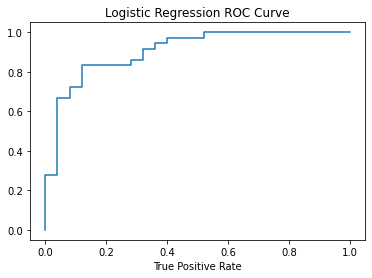

Thresholds:
 [1.98464417 0.98464417 0.94807352 0.94806528 0.80763943 0.78805198
 0.72378329 0.69265161 0.53969546 0.36460625 0.34447515 0.30676898
 0.23643285 0.19802587 0.17307491 0.17152065 0.16493924 0.1273485
 0.12472268 0.00200379]


In [396]:
from sklearn import metrics
# generate roc curve data
fpr, tpr, thresholds = metrics.roc_curve(y_test, class_1_probabilities)

# plot it
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

# print thresholds
print("Thresholds:\n", thresholds)

Q18) [2 points] Use the roc_auc_score function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) to report the AUC score using the exact same setup as the last question.

In [397]:
score = metrics.roc_auc_score(y_test, class_1_probabilities)
print("AUC Score:", score)

AUC Score: 0.9055555555555554
